<a href="https://colab.research.google.com/github/jeenajulius/Data-Visualization/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the TSV file
file_path = 'euromillions-results_ch.tsv'
data = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the dataset
data.head()
# Parse the date column
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')

# Set the date column as the index
data.set_index('Date', inplace=True)

# Display the first few rows to verify the changes
data.head()



,Numeros,Etoiles,SUPER-STAR
Date,,,
2021-04-09,2-8-32-35-44,8-11,K-6-4-2-Y
2021-04-06,2-21-37-38-50,7-8,T-5-1-8-C
2021-04-02,4-21-34-40-47,2-5,K-1-4-0-C
2021-03-30,24-27-28-29-42,4-8,N-9-1-3-F
2021-03-26,10-12-37-49-50,3-8,I-6-6-4-V


In [2]:
# Split the "Numeros" column into separate columns
numeros_split = data['Numeros'].str.split('-', expand=True)
numeros_split.columns = ['Num1', 'Num2', 'Num3', 'Num4', 'Num5']

# Convert the split columns to integers
numeros_split = numeros_split.astype(int)

# Merge the split columns back into the original dataframe
data = data.join(numeros_split)

# Display the first few rows to verify the changes
data.head()


,Numeros,Etoiles,SUPER-STAR,Num1,Num2,Num3,Num4,Num5
Date,,,,,,,,
2021-04-09,2-8-32-35-44,8-11,K-6-4-2-Y,2,8,32,35,44
2021-04-06,2-21-37-38-50,7-8,T-5-1-8-C,2,21,37,38,50
2021-04-02,4-21-34-40-47,2-5,K-1-4-0-C,4,21,34,40,47
2021-03-30,24-27-28-29-42,4-8,N-9-1-3-F,24,27,28,29,42
2021-03-26,10-12-37-49-50,3-8,I-6-6-4-V,10,12,37,49,50


In [3]:
import matplotlib.pyplot as plt

# Count the occurrences of each number
number_counts = pd.DataFrame()
for i in range(1, 6):
    number_counts = number_counts.add(data[f'Num{i}'].value_counts(), fill_value=0)

# Sort the counts by number
number_counts = number_counts.sort_index()

# Plot the frequency of each number
plt.figure(figsize=(12, 6))
plt.plot(number_counts.index, number_counts.values)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Each Number in EuroMillions Draws')
plt.grid(True)
plt.show()


NotImplementedError: fill_value 0 not supported.

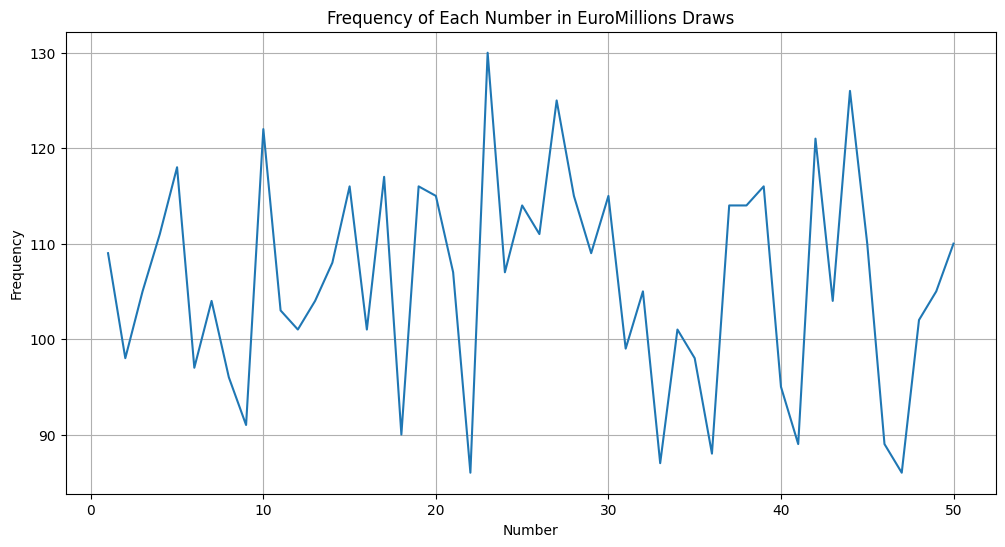

In [4]:
import matplotlib.pyplot as plt

# Count the occurrences of each number
number_counts = pd.Series()
for i in range(1, 6):
    number_counts = number_counts.add(data[f'Num{i}'].value_counts(), fill_value=0)

# Sort the counts by number
number_counts = number_counts.sort_index()

# Plot the frequency of each number
plt.figure(figsize=(12, 6))
plt.plot(number_counts.index, number_counts.values)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Each Number in EuroMillions Draws')
plt.grid(True)
plt.show()